本题目要求根据发病时间和血肿体积变化情况，计算该患者在发病48小时内是否发生**血肿扩张**，主要考察python pandas数据操作能力，类似于SQL。 

In [4]:
## 导入所需库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")  # 忽略所有警告

# 设置中文字体
matplotlib.rcParams['font.family'] = 'SimHei'  # 黑体
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号

## 一、读取数据与数据处理

### 1、数据读取与处理

In [5]:
## 读取xlsx数据
data1 = pd.read_csv('../处理后的数据/表1-患者列表及临床信息.csv')
data2 = pd.read_csv('../处理后的数据/表2-血肿及水肿的体积及位置.csv')
time_data = pd.read_csv("../处理后的数据/附表1-时间点-流水号.csv")  # 流水号、ID、时间对照表

In [6]:
data1.shape, data2.shape, time_data.shape

((160, 23), (593, 25), (662, 5))

### 2、数据处理

In [7]:
data1.columns

Index(['ID', '90天mRS', '数据集划分', '流水号', '年龄', '性别', '脑出血前mRS评分', '高血压病史',
       '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', '发病到首次影像检查时间间隔', '血压',
       '脑室引流', '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经'],
      dtype='object')

In [8]:
# 提取表1所需数据
df_data1 = data1[["ID", "发病到首次影像检查时间间隔"]]
df_data1.head(1)

,ID,发病到首次影像检查时间间隔
0,sub001,2.5


In [9]:
### 表2数据处理
data2.head(1)

,ID,流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,...,ED_MCA_R_Ratio,ED_PCA_R_Ratio,ED_Pons_Medulla_R_Ratio,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio,检查次序
0,sub001,20161212002136,69714.0,0.000258,0.877112,0.120148,0.0,0.0,0.0,0.0,...,0.726241,0.136511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
data2.shape

(593, 25)

In [11]:
### 附表1-时间点-流水号数据处理
time_data.head(1)

,ID,重复次数,随访时间点,流水号,检查次序
0,Hemo0001,5,2016-12-12 23:32:54,2.016121e+13,0


In [12]:
time_data.shape

(662, 5)

In [13]:
### 表2和对照表合并得到df_merge，表1和df_merge合并，向左合并，最终得到df_merge
time_data = time_data[["重复次数", "随访时间点", "流水号"]]
df_merge = pd.merge(data2, df_data1,  on='ID',    how='left')
df_merge = pd.merge(df_merge, time_data, on='流水号', how='left')

## 按照ID优先，检查次序第2第顺序进行升序排序
df_merge = df_merge.sort_values(by=['ID', '检查次序'], ascending=[True, True])
# 只要sub001-sub100的样本数据
df_merge = df_merge[(df_merge['ID'] >= "sub001") & (df_merge["ID"] <= "sub100")]
df_merge = df_merge.reset_index(drop=True)  # 重置索引  # merge操作、排序、合并、筛选操作后，索引可能变得混乱，需要重置索引
print(df_merge.shape)
df_merge.head()

(450, 28)


,ID,流水号,HM_volume,HM_ACA_R_Ratio,HM_MCA_R_Ratio,HM_PCA_R_Ratio,HM_Pons_Medulla_R_Ratio,HM_Cerebellum_R_Ratio,HM_ACA_L_Ratio,HM_MCA_L_Ratio,...,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio,检查次序,发病到首次影像检查时间间隔,重复次数,随访时间点
0,sub001,20161212002136,69714.0,0.000258,0.877112,0.120148,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,2.5,5,2016-12-12 23:32:54
1,sub001,20161213000009,74902.0,0.000360,0.869683,0.126018,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1,2.5,5,2016-12-13 05:19:00
2,sub001,20161218000100,70952.0,0.001550,0.817059,0.165718,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,2,2.5,5,2016-12-18 09:09:24
3,sub001,20161223001020,62831.0,0.004663,0.803505,0.177158,0.000048,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,3,2.5,5,2016-12-23 16:47:09
4,sub001,20161230000574,44029.0,0.000341,0.835563,0.154784,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000016,0.0,0.0,4,2.5,5,2016-12-30 14:35:12


### 3、获取所需数据

In [14]:
df_q1a = df_merge[["ID", "流水号", "检查次序",	"重复次数",	"随访时间点", "发病到首次影像检查时间间隔", "HM_volume"]]  # 只需要这几列数据
# 发现流水号列数据有小数，不合理，需要进行处理
df_q1a['流水号'] = df_q1a['流水号'].apply(lambda x: f"{x:.0f}")  # 将列 'A' 的数据类型转换为整型
df_q1a['流水号'] = df_q1a['流水号'].astype(str)  # 将列 'A' 的数据类型转换为字符型
df_q1a = df_q1a.reset_index(drop=True)  # 重置索引
print(df_q1a.shape)
print(df_q1a.dtypes)
df_q1a.head()

(450, 7)
ID                object
流水号               object
检查次序               int64
重复次数               int64
随访时间点             object
发病到首次影像检查时间间隔    float64
HM_volume        float64
dtype: object


,ID,流水号,检查次序,重复次数,随访时间点,发病到首次影像检查时间间隔,HM_volume
0,sub001,20161212002136,0,5,2016-12-12 23:32:54,2.5,69714.0
1,sub001,20161213000009,1,5,2016-12-13 05:19:00,2.5,74902.0
2,sub001,20161218000100,2,5,2016-12-18 09:09:24,2.5,70952.0
3,sub001,20161223001020,3,5,2016-12-23 16:47:09,2.5,62831.0
4,sub001,20161230000574,4,5,2016-12-30 14:35:12,2.5,44029.0


In [15]:
# 日期格式转换
df_q1a['随访时间点'] = pd.to_datetime(df_q1a['随访时间点'])
df_q1a['判定ID是否连续'] = list(df_q1a['ID'] == df_q1a['ID'].shift()) # 检查是否是连续的
df_q1a["发病到首次影像检查时间间隔"] = df_q1a["发病到首次影像检查时间间隔"].apply(lambda x: x * 3600)
df_q1a.head()

,ID,流水号,检查次序,重复次数,随访时间点,发病到首次影像检查时间间隔,HM_volume,判定ID是否连续
0,sub001,20161212002136,0,5,2016-12-12 23:32:54,9000.0,69714.0,False
1,sub001,20161213000009,1,5,2016-12-13 05:19:00,9000.0,74902.0,True
2,sub001,20161218000100,2,5,2016-12-18 09:09:24,9000.0,70952.0,True
3,sub001,20161223001020,3,5,2016-12-23 16:47:09,9000.0,62831.0,True
4,sub001,20161230000574,4,5,2016-12-30 14:35:12,9000.0,44029.0,True


## 二、数据计算

In [16]:
# 写循环实现吧，实际上，df中要避免循环for操作，因为效率太低了，但是这里数据量不大，可以尝试一下
# 重复次数 = 检查次序 + 1
temp_list_diff1 = []
temp_list_diff2 = []
for i in range(1, 101):
    temp_str = f"sub{i:03d}"
    temp_df = df_q1a[df_q1a['ID'] == temp_str]
    temp_df['距首次检查时间间隔'] = (temp_df['随访时间点'] - temp_df['随访时间点'].iloc[0]).dt.total_seconds()  # 计算时间差，并转换为秒
    temp_df["检查距发病时间间隔"] = temp_df['距首次检查时间间隔'] + temp_df['发病到首次影像检查时间间隔'].iloc[0]
    temp_list1 = temp_df['距首次检查时间间隔'].to_list()
    temp_list2 = temp_df["检查距发病时间间隔"].to_list()
    for j in range(len(temp_list1)):
        temp_list_diff1.append(temp_list1[j])
        temp_list_diff2.append(temp_list2[j])
    
df_q1a['距首次检查时间间隔'] = temp_list_diff1
df_q1a['检查距发病时间间隔'] = temp_list_diff2
print(df_q1a.shape)
df_q1a.head()

(450, 10)


,ID,流水号,检查次序,重复次数,随访时间点,发病到首次影像检查时间间隔,HM_volume,判定ID是否连续,距首次检查时间间隔,检查距发病时间间隔
0,sub001,20161212002136,0,5,2016-12-12 23:32:54,9000.0,69714.0,False,0.0,9000.0
1,sub001,20161213000009,1,5,2016-12-13 05:19:00,9000.0,74902.0,True,20766.0,29766.0
2,sub001,20161218000100,2,5,2016-12-18 09:09:24,9000.0,70952.0,True,466590.0,475590.0
3,sub001,20161223001020,3,5,2016-12-23 16:47:09,9000.0,62831.0,True,926055.0,935055.0
4,sub001,20161230000574,4,5,2016-12-30 14:35:12,9000.0,44029.0,True,1522938.0,1531938.0


In [17]:
df_q1a[df_q1a["ID"] == "sub003"]

,ID,流水号,检查次序,重复次数,随访时间点,发病到首次影像检查时间间隔,HM_volume,判定ID是否连续,距首次检查时间间隔,检查距发病时间间隔
10,sub003,20160413000006,0,3,2016-04-13 01:18:17,7200.0,86396.0,False,0.0,7200.0
11,sub003,20160413000428,1,3,2016-04-13 08:49:38,7200.0,106042.0,True,27081.0,34281.0
12,sub003,20160414001379,2,3,2016-04-14 14:54:02,7200.0,103263.0,True,135345.0,142545.0


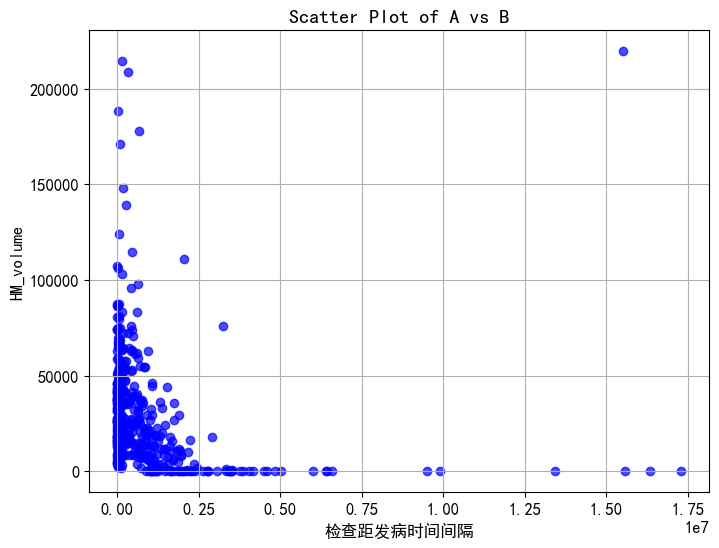

In [18]:
## 绘制发病时间与血肿体积散点图
x = df_q1a['检查距发病时间间隔']
y = df_q1a['HM_volume']
# 使用 Matplotlib 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7)
plt.title('Scatter Plot of A vs B')
plt.xlabel('检查距发病时间间隔')
plt.ylabel('HM_volume')
plt.grid(True)
plt.show()

### 1、计算血肿相对体积变化及变化率

In [19]:
### 提取问题1a所需的列
df_q1a = df_q1a[['ID', '流水号', '检查次序', '重复次数', 'HM_volume', '检查距发病时间间隔']]
# df_q1a["HM_volume"] = df_q1a["HM_volume"] * 10**(-3)  # 将单位转换为ml^3
# pct_change是当前比上前一个数据变化的百分比，不适用于此处

temp_list_rate = []
temp_list_change = []
for i in range(1, 101):  # 又写循环了
    temp_str = f"sub{i:03d}"
    temp_df = df_q1a[df_q1a['ID'] == temp_str]
    temp_list = temp_df['HM_volume'].to_list()
    temp_list_rate.append(0)
    temp_list_change.append(0)
    for j in range(1, len(temp_list)):
        temp_list_rate.append((temp_list[j] - temp_list[0]) / temp_list[0] * 100)  # 计算血肿相对体积增加率
        temp_list_change.append(temp_list[j] - temp_list[0])  # 计算血肿体积变化量
df_q1a['HM_volume_rate'] = temp_list_rate
df_q1a['HM_volume_change'] = temp_list_change
df_q1a

,ID,流水号,检查次序,重复次数,HM_volume,检查距发病时间间隔,HM_volume_rate,HM_volume_change
0,sub001,20161212002136,0,5,69714.0,9000.0,0.000000,0.0
1,sub001,20161213000009,1,5,74902.0,29766.0,7.441834,5188.0
2,sub001,20161218000100,2,5,70952.0,475590.0,1.775827,1238.0
3,sub001,20161223001020,3,5,62831.0,935055.0,-9.873196,-6883.0
4,sub001,20161230000574,4,5,44029.0,1531938.0,-36.843389,-25685.0
...,...,...,...,...,...,...,...,...
445,sub099,20180621000781,1,3,58149.0,63622.0,55.857836,20840.0
446,sub099,20180622000871,2,3,52350.0,153106.0,40.314669,15041.0
447,sub100,20180314000010,0,3,14659.0,1800.0,0.000000,0.0
448,sub100,20180315001448,1,3,16176.0,125032.0,10.348591,1517.0


### 2、是否发生血肿扩张

是否发生血肿扩张可根据血肿体积前后变化，具体定义为：后续检查比首次检查绝对体积增加≥6 mL 或相对体积增加≥33%。

$相对体积增加= \frac{最终体积−初始体积}{初始体积}×100%$

表中单位是 $10^{-3}$ ml

48 * 3600 = 172800

In [20]:
### 计算是否发生血肿扩大
df_q1a["是否在48H内"] = df_q1a["检查距发病时间间隔"] <= 172800  # 如果 A <= 172800，B 为 True，否则为 False
df_q1a["相对体积变化是否大于33%"] = df_q1a["HM_volume_rate"] >= 33
df_q1a["绝对体积变化是否大于6ml"] = df_q1a["HM_volume_change"] >= 6000
df_q1a["check"] = df_q1a["是否在48H内"] & (df_q1a["相对体积变化是否大于33%"] |df_q1a["绝对体积变化是否大于6ml"])

In [77]:
### 数据聚合
df_q1a_result = df_q1a.copy()
df_q1a_result.drop(columns=["流水号", "检查次序", "重复次数", "是否在48H内", "相对体积变化是否大于33%", "绝对体积变化是否大于6ml"], inplace=True)

group_q1a = df_q1a_result.groupby('ID').agg(
    {'check': 'sum'}
)
# df_q1a_result = df_q1a[df_q1a["是否在48H内"] == True]  # 这会导致缺一个样本
group_q1a["是否发生血肿扩张"] = group_q1a["check"] > 0
group_q1a['是否发生血肿扩张'] = group_q1a['是否发生血肿扩张'].replace({True: 1, False: 0})
group_q1a.drop(columns=["check"], inplace=True)
group_q1a.reset_index(inplace=True)
group_q1a

,ID,是否发生血肿扩张
0,sub001,0
1,sub002,0
2,sub003,1
3,sub004,0
4,sub005,1
...,...,...
95,sub096,0
96,sub097,0
97,sub098,1
98,sub099,1


### 3、计算血肿扩张时间

In [78]:
id_list = list(group_q1a[group_q1a["是否发生血肿扩张"] == 1]["ID"])
temp_list = []
for i in range(len(id_list)):
    id = id_list[i]
    temp_df = df_q1a[df_q1a["ID"] == id]
    temp_df.reset_index(drop=True, inplace=True)
    for j in range(temp_df.shape[0]):
        if temp_df.iloc[j, -1] == True:
            temp_list.append([temp_df.iloc[j, 0], temp_df.iloc[j, 5]])
            break
temp_df = pd.DataFrame(temp_list, columns=["ID", "发病时间"])
print(temp_df.shape)
group_q1a = pd.merge(group_q1a, temp_df, on='ID', how='left')

(23, 2)


In [79]:
group_q1a["发病时间"] = group_q1a["发病时间"].apply(lambda x: x / 3600)
group_q1a["发病时间1"] = group_q1a["发病时间"].apply(lambda x: f"{x:.2f}")
group_q1a

,ID,是否发生血肿扩张,发病时间,发病时间1
0,sub001,0,NaN,nan
1,sub002,0,NaN,nan
2,sub003,1,9.522500,9.52
3,sub004,0,NaN,nan
4,sub005,1,26.467500,26.47
...,...,...,...,...
95,sub096,0,NaN,nan
96,sub097,0,NaN,nan
97,sub098,1,42.756667,42.76
98,sub099,1,17.672778,17.67


In [ ]:
## 微调个例样本
group_q1a.loc[group_q1a["ID"] == 'sub052', "是否发生血肿扩张"] = 1
group_q1a.loc[group_q1a["ID"] == 'sub052', "发病时间1"] = "48.00"

In [82]:
group_q1a.to_csv("../output/result_q1a.csv", index=False)

问题 1a 结束